Сначала читаем датасет



In [17]:
import pandas as pd

df = pd.read_csv('data/signal_200000.csv')
df.head()



,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,spike91,spike92,spike93,spike94,spike95,spike96,spike97,spike98,spike99,spike100
0,50,54,50,51,52,49,54,48,50,53,...,0,0,0,0,0,0,0,0,0,0
1,50,54,50,51,52,49,54,48,50,53,...,0,0,0,0,0,0,0,0,0,0
2,47,54,52,52,48,47,50,53,49,51,...,0,0,0,0,0,0,0,0,0,0
3,47,54,52,52,48,47,50,53,49,51,...,0,0,0,0,0,0,0,0,0,0
4,52,52,50,50,49,51,50,48,53,51,...,0,0,0,0,0,0,0,0,0,0


Строим график для примера одной из колонок

<Axes: >

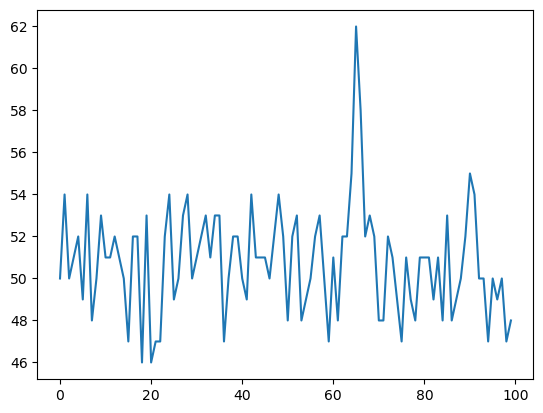

In [18]:
dataset = df.values
s = pd.Series(dataset[1][0:100])
s.plot.line() 

Создаем нейронку из 100 нейронов

In [19]:
X = dataset[:,0:100]
print(X)

[[50 54 50 ... 50 47 48]
 [50 54 50 ... 50 47 48]
 [47 54 52 ... 55 53 47]
 ...
 [53 46 53 ... 53 50 50]
 [52 48 52 ... 49 51 52]
 [55 54 62 ... 49 51 52]]


In [20]:
Y = dataset[:,100:]
print(Y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [21]:
from sklearn import preprocessing

In [22]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [23]:
X_scale

array([[0.21052632, 0.42105263, 0.21052632, ..., 0.21052632, 0.05263158,
        0.10526316],
       [0.21052632, 0.42105263, 0.21052632, ..., 0.21052632, 0.05263158,
        0.10526316],
       [0.05263158, 0.42105263, 0.31578947, ..., 0.47368421, 0.36842105,
        0.05263158],
       ...,
       [0.36842105, 0.        , 0.36842105, ..., 0.36842105, 0.21052632,
        0.21052632],
       [0.31578947, 0.10526316, 0.31578947, ..., 0.15789474, 0.26315789,
        0.31578947],
       [0.47368421, 0.42105263, 0.84210526, ..., 0.15789474, 0.26315789,
        0.31578947]])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [26]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(280000, 100) (60000, 100) (60000, 100) (280000, 100) (60000, 100) (60000, 100)


In [50]:
from keras.models import Sequential
from keras.layers import Dense

In [55]:
model = Sequential([
    Dense(100, activation='relu', input_shape=(100,)),
    Dense(100, activation='softmax'),
])

In [56]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Далее мы тренируем сетку нужно поиграться с размерами бача и чаислом эпох

In [57]:
hist = model.fit(X_train, Y_train,
          batch_size=2500, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0054 - loss: 0.3564 - val_accuracy: 0.0051 - val_loss: 0.0326
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0055 - loss: 0.0325 - val_accuracy: 0.0089 - val_loss: 0.0324
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0093 - loss: 0.0324 - val_accuracy: 0.0165 - val_loss: 0.0322
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0192 - loss: 0.0321 - val_accuracy: 0.0265 - val_loss: 0.0317
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0363 - loss: 0.0314 - val_accuracy: 0.0507 - val_loss: 0.0304
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0610 - loss: 0.0299 - val_accuracy: 0.0770 - val_loss: 0.0285
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0855 - loss: 0.0279 - val_accuracy: 0.1052 - val_loss: 0.0263
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1171 - loss: 0.0256 - val_accu

In [35]:
model.evaluate(X_test, Y_test)[1]

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - accuracy: 0.0122 - loss: 0.0321


0.012266666628420353

In [72]:
predictions = model.predict(X_test)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step


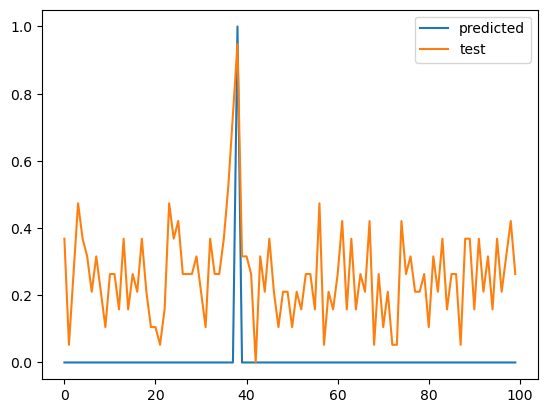

In [86]:
import numpy as np
num = 120

predict_array = np.array(predictions[num])
df = pd.DataFrame({
   'predicted': np.round(predict_array),
   'test': X_test[num]
   # 'expected': Y_test[num],
   
   })
lines = df.plot.line()


На самом деле если присмотреться то моделька работает и выдает неплохие значения
Теперь мы сохраним дамп

In [75]:
# serialize model to JSON
model_json = model.to_json()
with open("./data/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("./data/model.weights.h5")
print("Saved model to disk")

Saved model to disk


Теперь рекомендую воспользоваться [https://github.com/pplonski/keras2cpp] для того чтобы портировать нейронку в С++